# The Central Limit Theorem

The central limit theorem provides the theoretical foundation for the practice of repeated measurements in order to improve the accuracy of the final result. Given an arbitrary distribution $h(x)$, characterized by its mean $\mu$ and standard deviation $\sigma$, the central limit theorem states that the mean of $N$ values $x_i$ drawn from that distribution will approximately follow a Gaussian distribution, with the approximation accuracy improving with increased $N$. The theorem also explains why most measurement errors follow a Gaussian distribution. If we take the error term as the sum of numerous individual error terms, then their sum is nicely approximated by a Gaussian distribution.

Our constraints of $h(x)$ are essential for this theorem to work: it *must* have a standard deviation, and thus its tails must fall off faster than $1/x^2$ for large $x$. As more measurements are combined, the tails will be “clipped” and eventually (for large $N$), the distribution of the mean will approximately follow a Gaussian with mean $\mu$ and standard deviation $\sigma$ /$\sqrt{N}$.

In the following plots, we will show this to be true. First we will define $N$ and use `np.random.random` to generate 10 uniform distribtions (with $\mu = 0.5$ and $W = 1$) that range from $(0,1)$ and have $10^6$ data points. Recall that a uniform distribution on $[0,1]$ has a standard deviation of $1/\sqrt{12}$.

In [103]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, cauchy

# Generate the uniform samples
N = [2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))
print(x.shape)

(10, 1000000)


Next, for each value of $N$, we will take the mean of $N$ of samples. After plotting the histogram of the distribution, we will then plot the expected Gaussian pdf over top of it with $\mu = 0.5$ and $\sigma_i = 1/\sqrt{(12\cdot N[i])}$. The Gaussian distribution is implemented in `scipy.stats.norm`, and `np.linspace` is used to create an evenly spaced sequence of numbers $\text{x_pdf}$ to plot against.

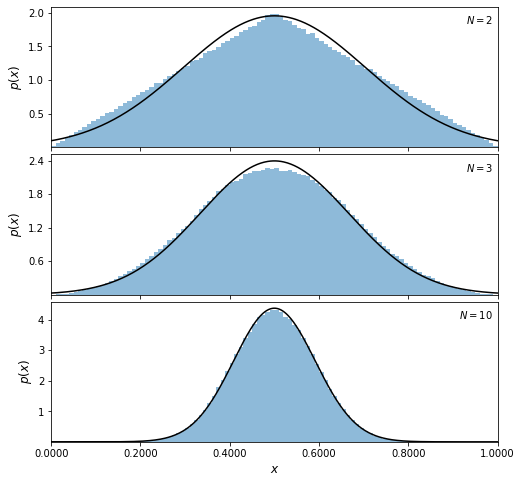

In [104]:
# Plot the results
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$', fontsize = 12)
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$', fontsize = 12)

plt.show()

The distribution for $N = 2$ has a triangular shape, and as $N$ increases, it becomes increasingly similar to a Gaussian. The predicted normal distribution with $\mu = 0.5$ and $\sigma = 1/ 12N$ is shown by the line. Already for $N = 10$, the “observed” distribution is essentially the same as the predicted distribution. Thus, we can see that by increasing $N$, we get increasingly closer to a Gaussian distribution, which is in accordance with the central limit theorem.